<a href="https://colab.research.google.com/github/imnadiarasheed/ML/blob/main/Ass1_LogReg_GD(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.optimize import fmin_tnc

In [ ]:
df_train=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/train.csv")
df_test=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/test.csv")
df_gt=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/gender_submission.csv")
#print(df_train.head(5)), print(df_test.head(5)), print(df_gt.head(5))

In [ ]:
df_train.drop("PassengerId",axis=1,inplace=True), df_test.drop("PassengerId",axis=1,inplace=True)
df_train.drop("Name",axis=1,inplace=True), df_test.drop("Name",axis=1,inplace=True)
df_train.drop("Ticket",axis=1,inplace=True), df_test.drop("Ticket",axis=1,inplace=True)
df_train.drop("Cabin",axis=1,inplace=True), df_test.drop("Cabin",axis=1,inplace=True)
print(df_train), print(df_test)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0   

(None, None)

**Preprocessing**

**Data Cleaning**

In [ ]:
print(df_train.isnull().sum()), print(df_test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


(None, None)

In [ ]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
#df_train['Embarked'].fillna(df_train['Embarked'].mode(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [ ]:
print(df_train.isnull().sum()), print(df_test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


(None, None)

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])
print(df_train), print(df_test)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1 

(None, None)

**Training and Testing using Logistic Regression GD**

In [ ]:
class LogisticRegressionUsingGD:

    @staticmethod
    def sigmoid(x):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression

        return np.dot(x, theta)

    def probability(self, theta, x):
        # Calculates the probability that an instance belongs to a particular class

        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Computes the cost function for all the training samples
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        # Computes the gradient of the cost function at the point theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        """trains the model from the training data

        Uses the fmin_tnc function that is used to find the minimum for any function
        It takes arguments as
            1) func : function to minimize
            2) x0 : initial values for the parameters
            3) fprime: gradient for the function defined by 'func'
            4) args: arguments passed to the function

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples

        y: array-like, shape = [n_samples, n_target_values]
            Target classes

        theta: initial weights

        Returns
        -------

        self: An instance of self"""

        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        """ Predicts the class labels

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Test samples

        Returns
        -------
        predicted class labels


        """
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        """Computes the accuracy of the classifier

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples

        actual_classes : class labels from the training data set

        probab_threshold: threshold/cutoff to categorize the samples into different classes

        Returns
        -------
        accuracy: accuracy of the model

        """
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy

In [46]:
def funx(xlabel, ylabel):
    # load the data from the file
    #data = load_data("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/marks.txt", None)

    X_train = X_train1.to_numpy()
    y_train = y_train1.to_numpy()
    X_test = X_test1.to_numpy()
    y_test = y_test1.to_numpy()

    # filter out the applicants that Survived
    survived = training_data.loc[training_data['Survived'] == 1]

    # filter out the applicants that din't Survived
    not_survived = training_data.loc[training_data['Survived'] == 0]

    # plots
    #plt.scatter(survived.iloc[:, 0], survived.iloc[:, 1], s=10, label='Survived')
    #plt.scatter(not_survived.iloc[:, 0], not_survived.iloc[:, 1], s=10, label='Not Survived')

    # preparing the data for building the model

    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    theta = np.zeros((X_train.shape[1], 1))

    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X_train, y_train, theta)
    accuracy_train = model.accuracy(X_train, y_train)
    accuracy_test = model.accuracy(X_test, y_test)
    parameters = model.w_

    print("The model parameters using Gradient descent")
    print(parameters)
    print('\nTraining Accuracy')
    print("The accuracy of the model is {}".format(accuracy_train))
    print('Test Accuracy')
    print('The accuracy of the model is {}'.format(accuracy_test))
    print("\n")

    # plotting the decision boundary
    # As there are two features
    # wo + w1x1 + w2x2 = 0
    # x2 = - (wo + w1x1)/(w2)

    x_values = [np.min(X_train[:, 1] - 2), np.max(X_train[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

    """plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()"""

    # Using scikit-learn
    model = LogisticRegression()
    model.fit(X_train, y_train)
    parameters = model.coef_
    predicted_classes_train = model.predict(X_train)
    predicted_classes_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train,predicted_classes_train)
    accuracy_test = accuracy_score(y_test,predicted_classes_test)

    print("The model parameters using scikit learn")
    print(parameters)
    print('\nTraining Accuracy')
    print('The accuracy score using scikit-learn is {}'.format(accuracy_train))
    print('Test Accuracy')
    print('The accuracy score using scikit-learn is {}'.format(accuracy_test))
    print('\n')
    #print(survived)

**Data Normalization & Feature Selection (All)**

In [47]:
X_train=df_train.copy()
X_test=df_test.copy()
y_test=df_gt.copy()

X_train['Fare'] = X_train['Fare'] / X_train['Fare'].max()
X_train['Age'] = X_train['Age'] / X_train['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()
X_test['Age'] = X_test['Age'] / X_test['Age'].max()

#training_data = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
training_data = X_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train1 = X_train[['Survived']]
X_train1 = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test1 = y_test[['Survived']]
X_test1 = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#training_data
funx('Pclass', 'Sex')

The model parameters using Gradient descent
[ 5.27996643 -1.08465876 -2.7426663  -3.14424168 -0.32928693 -0.10171888
  1.02309608 -0.21639783]

Training Accuracy
The accuracy of the model is 0.8002244668911336
Test Accuracy
The accuracy of the model is 0.9401913875598086


The model parameters using scikit learn
[[-1.65580301e-04 -1.02134814e+00 -2.61567322e+00 -2.25850079e+00
  -2.82473610e-01 -6.82520739e-02  4.86908605e-01 -2.28300972e-01]]

Training Accuracy
The accuracy score using scikit-learn is 0.8013468013468014
Test Accuracy
The accuracy score using scikit-learn is 0.9521531100478469




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Data Normalization & Feature Selection (Sex, Age)**

The model parameters using Gradient descent
[ 1.21280396 -2.50392625 -0.43946818]

Training Accuracy
The accuracy of the model is 0.7867564534231201
Test Accuracy
The accuracy of the model is 1.0




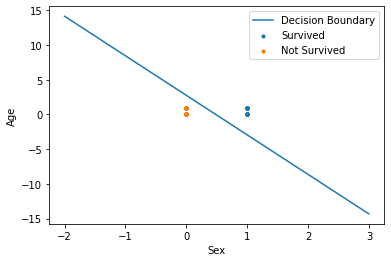

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The model parameters using scikit learn
[[ 2.30454460e-05 -2.43776665e+00 -3.57788846e-01]]

Training Accuracy
The accuracy score using scikit-learn is 0.7867564534231201
Test Accuracy
The accuracy score using scikit-learn is 1.0




In [ ]:
X_train=df_train.copy()
X_test=df_test.copy()
y_test=df_gt.copy()

X_train['Fare'] = X_train['Fare'] / X_train['Fare'].max()
X_train['Age'] = X_train['Age'] / X_train['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()
X_test['Age'] = X_test['Age'] / X_test['Age'].max()

#training_data = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
training_data = X_train[['Survived', 'Sex', 'Age']]
y_train1 = X_train[['Survived']]
X_train1 = X_train[['Sex', 'Age']]
y_test1 = y_test[['Survived']]
X_test1 = X_test[['Sex', 'Age']]
#training_data
funx('Sex', 'Age')

**Data Normalization & Feature Selection (Pclass, Sex)**

In [43]:
X_train=df_train.copy()
X_test=df_test.copy()
y_test=df_gt.copy()

X_train['Fare'] = X_train['Fare'] / X_train['Fare'].max()
X_train['Age'] = X_train['Age'] / X_train['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()
X_test['Age'] = X_test['Age'] / X_test['Age'].max()

#training_data = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
training_data = X_train[['Survived', 'Pclass', 'Sex']]
y_train1 = X_train[['Survived']]
X_train1 = X_train[['Pclass', 'Sex']]
y_test1 = y_test[['Survived']]
X_test1 = X_test[['Pclass', 'Sex']]
#training_data
#funx('Pclass', 'Sex')